In [94]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from scipy import stats as st


## Descrição do projeto

Você trabalha para a loja online Ice, que vende videogames no mundo todo. As avaliações de usuários e especialistas, gêneros, plataformas (por exemplo, Xbox ou PlayStation) e dados históricos sobre vendas de jogos estão disponíveis em fontes abertas. Você precisa identificar padrões que determinam se um jogo tem sucesso ou não. Isso vai permitir que você identifique possíveis sucessos e planeje campanhas publicitárias.

Os dados disponibilizados remontam a 2016. Vamos imaginar que estamos em dezembro de 2016 e você está planejando uma campanha para 2017.

O importante é ganhar experiência trabalhando com dados. Não importa se você está prevendo as vendas de 2017 com base nos dados de 2016 ou as vendas de 2027 com base nos dados de 2026.

O conjunto de dados contém uma coluna de "rating" (classificação) que armazena a classificação ESRB de cada jogo. O Entertainment Software Rating Board avalia o conteúdo de um jogo e atribui uma classificação etária, como Teen (Adolescente) ou Mature (Adulto).

## Etapa 1

In [98]:
df = pd.read_csv('datasets/games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Etapa 2

In [ ]:
# Substitua os nomes das colunas (transforme tudo em minúsculos).
df = df.rename(
    columns={
        'Name': 'name',
        'Platform': 'platform',
        'Year_of_Release': 'year_of_release',
        'Genre': 'genre',
        'NA_sales': 'na_sales',
        'EU_sales': 'eu_sales',
        'JP_sales': 'jp_sales',
        'Other_sales': 'other_sales',
        'Critic_Score': 'critic_score',
        'User_Score': 'user_score',
        'Rating': 'rating'
    }   
)

In [ ]:
# A coluna year_of_release possuia numeros nulos e foram substituidos por 0
# A coluna year_of_release foi alterada para inteiro, pois são anos e não possuem valores decimais.
# Existem valores nulos por não ter a informação de qual ano o jogo foi desenvolvido.
df['year_of_release'] = df['year_of_release'].fillna(0)
df['year_of_release'] = df['year_of_release'].astype(int)
# A coluna user_score possui valores com "tbd" e foram substituidos por NaN
# A coluna user_score foi alterada para float, pois são numeros e possuem decimais.
# Os campos com "tbd" são de jogos que ainda não tiveram nenhum voto dos usuários.
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype(float)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
# Criando uma coluna total_sales com a soma das vendas em todas as regiões
df["total_sales"] = df["na_sales"] + df["eu_sales"] + df["jp_sales"] + df["other_sales"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Etapa 3

In [ ]:
# Veja quantos jogos foram lançados a cada ano. Os dados de cada período são significativos?
df['year_of_release'].value_counts().sort_index()

### Informações dos períodos (anos)

269 Jogos não tem data de lançamento.
É possível perceber uma tendência de crescimento até o ano de 2011. Após 2012 houve uma queda que se tornou uma tendência até 2016.

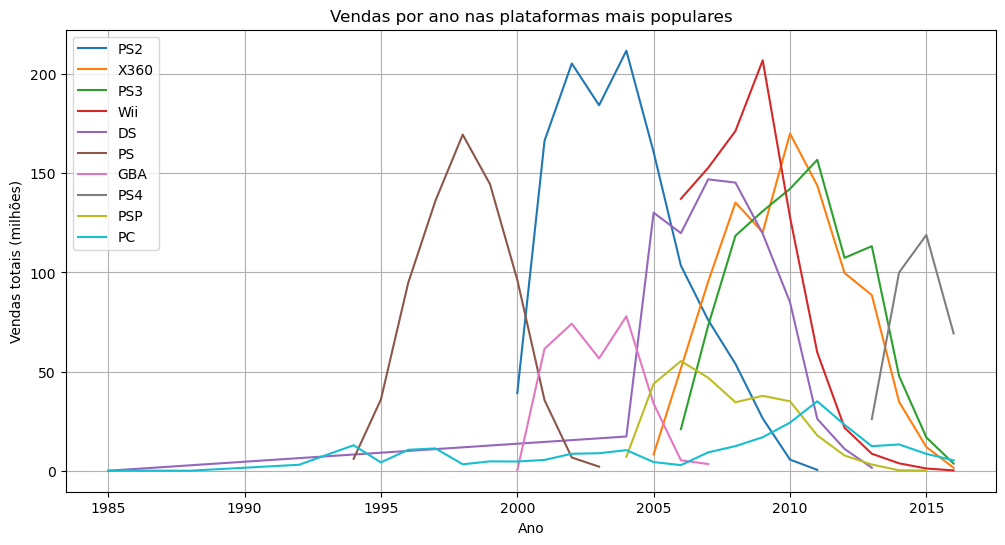

In [29]:
# Veja como as vendas variaram de plataforma para plataforma. 
# Escolha as plataformas com as maiores vendas totais e construa uma distribuição com base nos dados 
# para cada ano. Encontre as plataformas que costumavam ser populares, mas que agora não têm vendas. 
# Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?
total_sales_plataform = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

top_platforms = total_sales_plataform.head(10).index.tolist()

df_not_zero_year = df[df['year_of_release'] != 0]

plt.figure(figsize=(12, 6))
data = 0
for platform in top_platforms:
    df_platform = df_not_zero_year[df_not_zero_year['platform'] == platform]
    data = df_platform.groupby('year_of_release')['total_sales'].sum()
    
    plt.plot(data.index, data.values, label=platform)

plt.title('Vendas por ano nas plataformas mais populares')
plt.xlabel('Ano')
plt.ylabel('Vendas totais (milhões)')
plt.legend()
plt.grid(True)
plt.show()


### Variação das Vendas por ano 

Nos primeiros 15 anos, ou seja, até o ano 2000, existiam apenas 3 plataformas (PC, DS e PS) das dez mais vendidas. Na decada seguinte, entre 2000 e 2010, a plataforma PS deixou de existir e nasceu sua sucessora, a PS2 que se tornou a lider de vendas. Surgiram mais algumas outras plataformas nesse período: GBA, PSP, WII, X360 e PS3. A plataforma GBA durou pouco e encerrou ainda nessa decada. A entrada do PS3 marcou o fim da sua antecessora, o PS2, que veio a "morrer" no inicio da decada seguinte. Essa nova decada marcou também a morte do DS que havia nascido desde o inicio e o inicio do PS4, que antecipou a morte de todas as restantes, com exceção da plataforma PC, que existe desde o inicio, nunca teve grande destaque de vendas, mas se manteve ativa durente todo o período da amostra.

In [ ]:
df_atual = df[df['year_of_release'] == 2016]
total_sales_plataform_atual = df_atual.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms_atual = total_sales_plataform_atual.index.tolist()
# Obtive a lista de plataformas que em 2016 ainda producem jogos. Entendo que as plataformas anteriores,
# já não produzem mais e não tem relevância na construção de um modelo para 2017.
top_platforms_atual

['PS4', 'XOne', '3DS', 'PC', 'WiiU', 'PSV', 'PS3', 'X360', 'Wii']

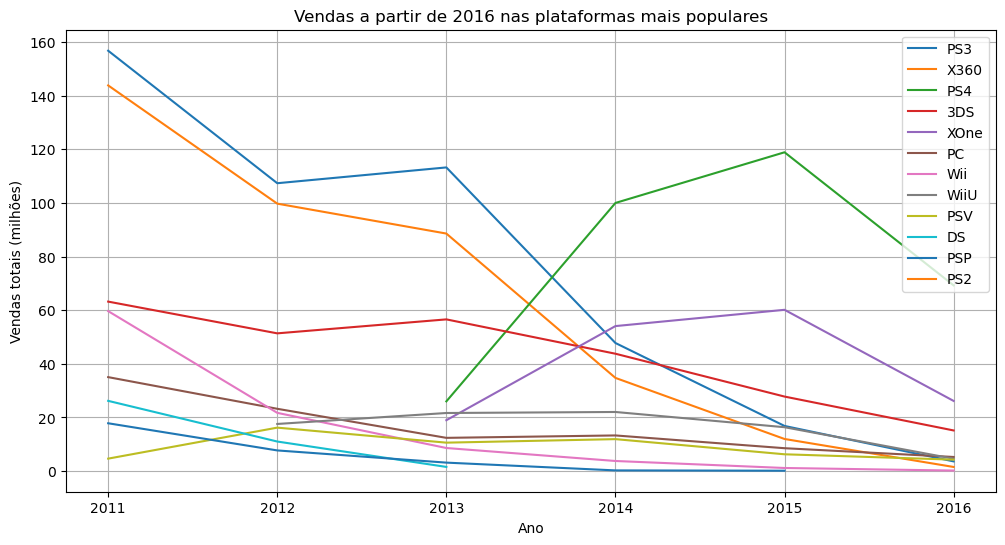

In [38]:
# Pegando apenas os jogos lançados nos últimos 5 anos
df_lastyears = df[df['year_of_release'] > 2010]
total_sales_plataform_lastyears = df_lastyears.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms_lastyears = total_sales_plataform_lastyears.index.tolist()

plt.figure(figsize=(12, 6))
data = 0
for platform in top_platforms_lastyears:
    df_platform_lastyears = df_lastyears[df_lastyears['platform'] == platform]
    data = df_platform_lastyears.groupby('year_of_release')['total_sales'].sum()
    
    plt.plot(data.index, data.values, label=platform)

plt.title('Vendas a partir de 2016 nas plataformas mais populares')
plt.xlabel('Ano')
plt.ylabel('Vendas totais (milhões)')
plt.legend()
plt.grid(True)
plt.show()


In [40]:
mean_sales = df_lastyears.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print(mean_sales)


platform
PS4     0.801378
X360    0.763815
XOne    0.645020
PS3     0.629336
WiiU    0.559116
3DS     0.503535
Wii     0.482335
PC      0.251105
DS      0.210489
PSV     0.125431
PSP     0.092981
PS2     0.064286
Name: total_sales, dtype: float64


### Definição do período relevante para obter os dados

As plataformas lideres em vendas nos ultimos 5 anos são PS4 e X360. Outras plataformas como Xone, PS3, 3DS e WiiU também se destacam por ainda possuir um legado considerável entre usuários que ainda não migraram de console.


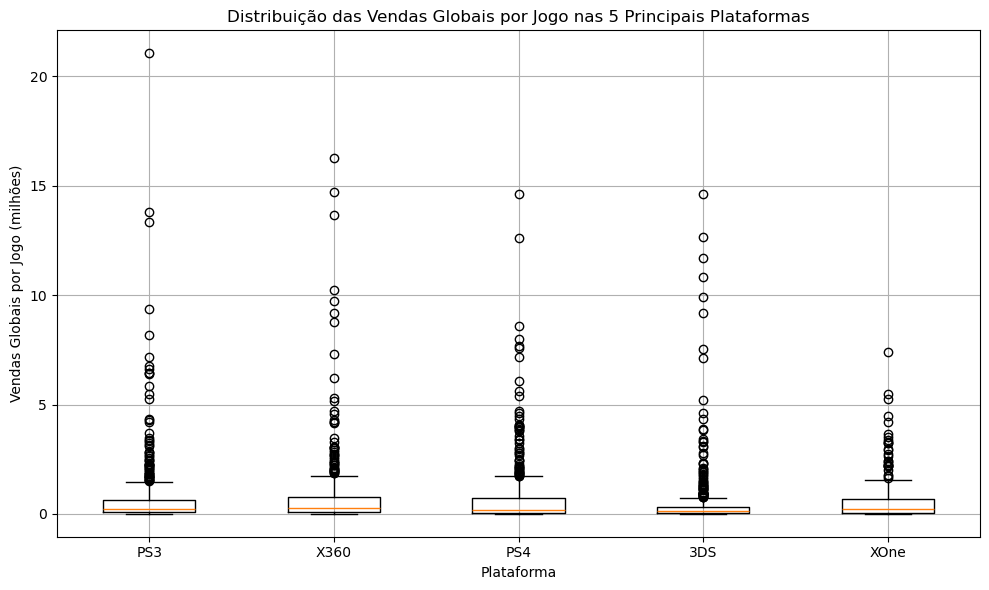

In [ ]:
sales_plataforms = (
    df_lastyears.groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top5_platforms = sales_plataforms.index.tolist()

df_top5 = df_lastyears[df_lastyears['platform'].isin(top5_platforms)]

data = [
    df_top5[df_top5['platform'] == platform]['total_sales']
    for platform in top5_platforms
]

plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=top5_platforms, showfliers=True)
plt.title('Vendas Globais por Jogo nas Principais Plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais por Jogo (milhões)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Diagrama de Caixa - Analise

É possível observar uma presença de outliers em todas as plataformas, existem jogos que individualmente representam uma discrepância muito grande das medias de vendas que são relativamente equilibradas entre as plataformas.

In [ ]:
# Analisar apenas a plataforma lider: PS4
df_ps4 = df_lastyears[
    (df_lastyears['platform'] == 'PS4') &
    (df_lastyears['total_sales'] > 0) &
    (df_lastyears['user_score'].notna()) &
    (df_lastyears['critic_score'].notna())
].copy()

# Converter user_score de string para float, tratando 'tbd'
df_ps4['user_score'] = pd.to_numeric(df_ps4['user_score'], errors='coerce')
df_plat = df_plat[df_plat['user_score'].notna()]  # remover tbd convertidos para NaN

# Gráfico de dispersão: avaliação de usuários vs vendas
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df_plat['user_score'], df_plat['total_sales'], alpha=0.6)
plt.title(f'User Score vs Vendas Globais ({plataforma})')
plt.xlabel('User Score')
plt.ylabel('Vendas Globais (milhões)')
plt.grid(True)

# Gráfico de dispersão: avaliação de críticos vs vendas
plt.subplot(1, 2, 2)
plt.scatter(df_plat['critic_score'], df_plat['total_sales'], alpha=0.6, color='orange')
plt.title(f'Critic Score vs Vendas Globais ({plataforma})')
plt.xlabel('Critic Score')
plt.ylabel('Vendas Globais (milhões)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Calcular correlações
cor_user = df_plat['user_score'].corr(df_plat['total_sales'])
cor_critic = df_plat['critic_score'].corr(df_plat['total_sales'])

print(f"Correlação entre User Score e Vendas ({plataforma}): {cor_user:.3f}")
print(f"Correlação entre Critic Score e Vendas ({plataforma}): {cor_critic:.3f}")



In [ ]:
df_ps4 = df_lastyears[
    (df_lastyears['platform'] == 'PS4') &    
    (df_lastyears['user_score'].notna()) &
    (df_lastyears['critic_score'].notna())
].copy()
df_ps4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 42 to 16530
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             249 non-null    object 
 1   platform         249 non-null    object 
 2   year_of_release  249 non-null    int64  
 3   genre            249 non-null    object 
 4   na_sales         249 non-null    float64
 5   eu_sales         249 non-null    float64
 6   jp_sales         249 non-null    float64
 7   other_sales      249 non-null    float64
 8   critic_score     249 non-null    float64
 9   user_score       249 non-null    float64
 10  rating           239 non-null    object 
 11  total_sales      249 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 25.3+ KB


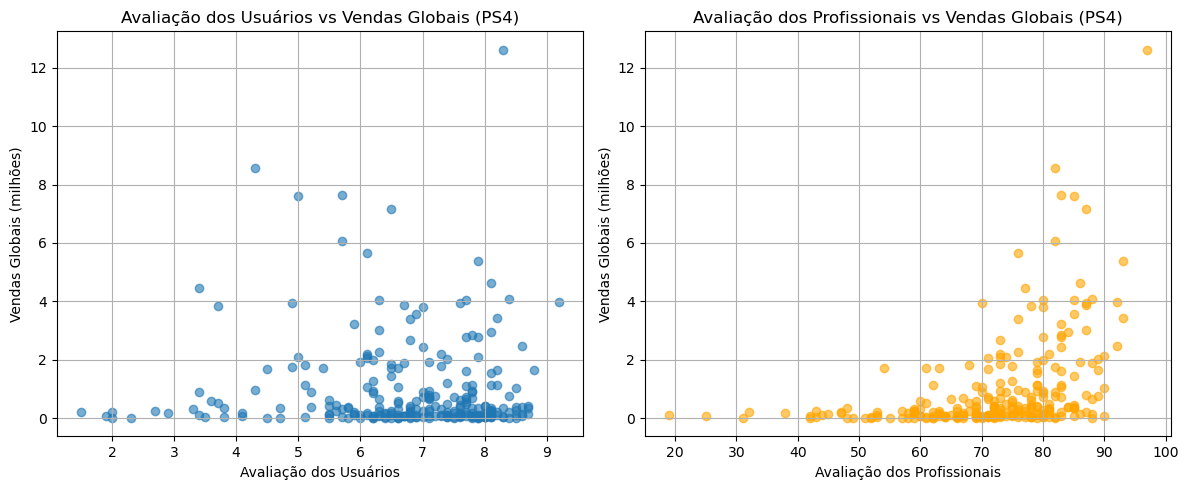

In [65]:
# Gráfico de dispersão: avaliação de usuários vs vendas
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df_ps4['user_score'], df_ps4['total_sales'], alpha=0.6)
plt.title(f'Avaliação dos Usuários vs Vendas Globais (PS4)')
plt.xlabel('Avaliação dos Usuários')
plt.ylabel('Vendas Globais (milhões)')
plt.grid(True)

# Gráfico de dispersão: avaliação de críticos vs vendas
plt.subplot(1, 2, 2)
plt.scatter(df_ps4['critic_score'], df_ps4['total_sales'], alpha=0.6, color='orange')
plt.title(f'Avaliação dos Profissionais vs Vendas Globais (PS4)')
plt.xlabel('Avaliação dos Profissionais')
plt.ylabel('Vendas Globais (milhões)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [67]:
# Calcular correlações
cor_user = df_ps4['user_score'].corr(df_ps4['total_sales'])
cor_critic = df_ps4['critic_score'].corr(df_ps4['total_sales'])

print(f"Correlação entre Avaliação dos Usuários e Vendas (PS4): {cor_user:.3f}")
print(f"Correlação entre Avaliação dos Profissionais e Vendas (PS4): {cor_critic:.3f}")

Correlação entre Avaliação dos Usuários e Vendas (PS4): -0.034
Correlação entre Avaliação dos Profissionais e Vendas (PS4): 0.406


### Correlação entre avaliação de usuários e profissionais

Ao analisar as correlações podemos observar que, para a plataforma PS4, as criticas dos profissionais geram influência maior nas vendas de jogos.

In [69]:
df_x360 = df_lastyears[
    (df_lastyears['platform'] == 'X360') &    
    (df_lastyears['user_score'].notna()) &
    (df_lastyears['critic_score'].notna())
].copy()

cor_user = df_x360['user_score'].corr(df_x360['total_sales'])
cor_critic = df_x360['critic_score'].corr(df_x360['total_sales'])

print(f"Correlação entre Avaliação dos Usuários e Vendas (X360): {cor_user:.3f}")
print(f"Correlação entre Avaliação dos Profissionais e Vendas (X360): {cor_critic:.3f}")


Correlação entre Avaliação dos Usuários e Vendas (X360): 0.024
Correlação entre Avaliação dos Profissionais e Vendas (X360): 0.390


Fazendo o mesmo estudo para a plataforma X360, podemos avaliar o mesmo resultado.

In [75]:
genre_count = df_lastyears['genre'].value_counts()
genre_count


genre
Action          1269
Role-Playing     465
Adventure        410
Sports           389
Misc             375
Shooter          329
Racing           180
Fighting         159
Simulation       136
Platform         122
Strategy         117
Puzzle            71
Name: count, dtype: int64

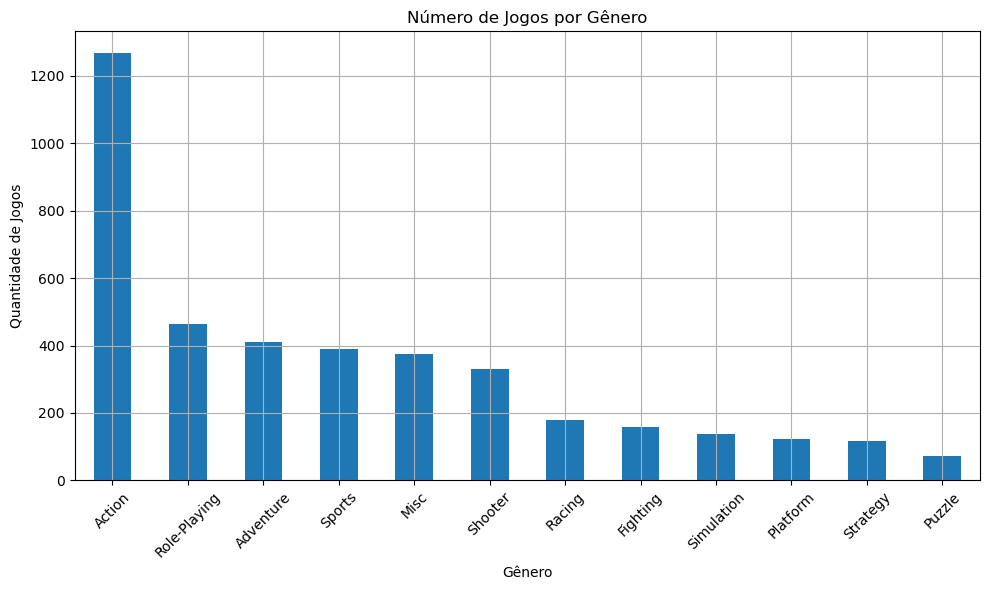

In [76]:
plt.figure(figsize=(10, 6))
genre_count.plot(kind='bar')
plt.title('Número de Jogos por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Jogos')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [77]:
genre_sales = df_lastyears.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_sales


genre
Action          557.80
Shooter         402.91
Role-Playing    245.63
Sports          237.15
Misc            139.42
Platform         88.68
Racing           88.31
Fighting         66.90
Simulation       50.26
Adventure        45.04
Strategy         22.16
Puzzle            9.85
Name: total_sales, dtype: float64

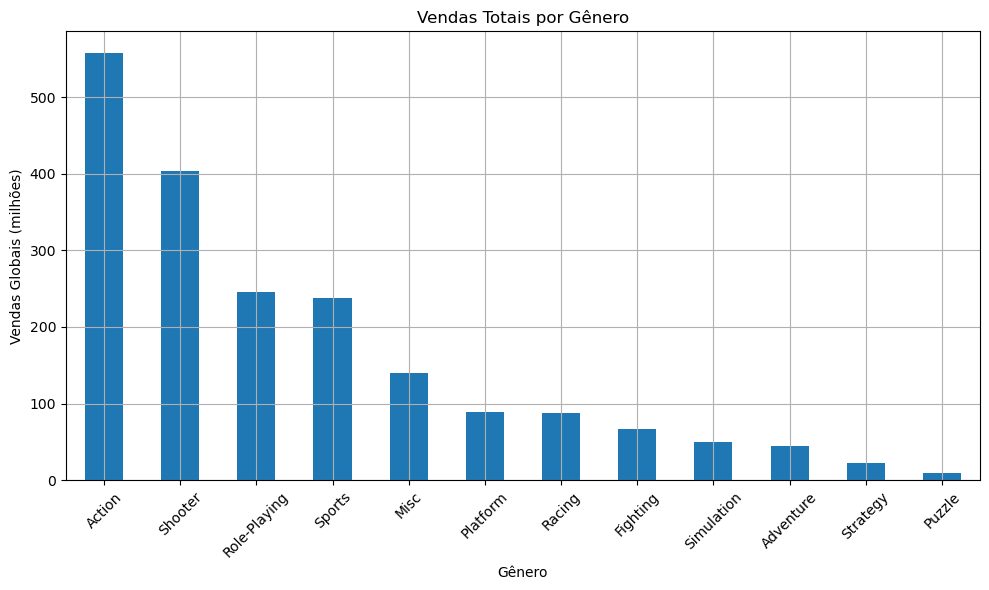

In [78]:
plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar')
plt.title('Vendas Totais por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Vendas Globais (milhões)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [81]:
gemre_sales_mean = df_lastyears.groupby('genre')['total_sales'].mean().sort_values(ascending=False)
gemre_sales_mean

genre
Shooter         1.224650
Platform        0.726885
Sports          0.609640
Role-Playing    0.528237
Racing          0.490611
Action          0.439559
Fighting        0.420755
Misc            0.371787
Simulation      0.369559
Strategy        0.189402
Puzzle          0.138732
Adventure       0.109854
Name: total_sales, dtype: float64

### Generos mais lucrativos 

O genero mais popular nos ultimos 5 anos é sem dúvida Ação. Também é o que mais arrecada, mas quando observamos a média temos alguns outros destaques, como jogos de plataforma e, principalmente de tiro que não tem tantos lançamentos, mas se destacam com excelentes vendas em média. Temos os jogos de Aventura, que são bastante produzidas, mas que geram muito pouca venda, seguido dos jogos de Quebra-cabeça e Estratégia.

## Etapa 4

In [82]:
top_platforms_na = df_lastyears.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
print(top_platforms_na)
top_platforms_eu = df_lastyears.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
print(top_platforms_eu)
top_platforms_jp = df_lastyears.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
print(top_platforms_jp)

platform
X360    226.80
PS3     168.26
PS4     108.74
XOne     93.12
3DS      82.65
Name: na_sales, dtype: float64
platform
PS3     163.10
PS4     141.09
X360    117.10
3DS      61.27
PC       56.70
Name: eu_sales, dtype: float64
platform
3DS    100.62
PS3     49.39
PSP     24.04
PSV     21.84
PS4     15.96
Name: jp_sales, dtype: float64


### Variações por plataformas

Existe uma grande variação nos perfis por região. Na América do Norte prevalece a plataforma X360. Já na Europa a maior parte dos usuários está na plataforma Playsation, onde podemos observar um movimento de migração do PS3 para o PS4. Por fim, no Japão a plataforma da Nintendo 3DS lidera com folga o mercado.

In [84]:
top_genres_na = df_lastyears.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
print(top_genres_na)
top_genres_eu = df_lastyears.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
print(top_genres_eu)
top_genres_jp = df_lastyears.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
print(top_genres_jp)

genre
Action          230.92
Shooter         194.43
Sports          108.70
Role-Playing     83.78
Misc             69.69
Name: na_sales, dtype: float64
genre
Action          199.12
Shooter         148.02
Sports           88.48
Role-Playing     62.30
Racing           40.58
Name: eu_sales, dtype: float64
genre
Role-Playing    79.87
Action          63.62
Misc            17.60
Fighting        12.38
Platform        12.13
Name: jp_sales, dtype: float64


### Variações por generos

Quando analisamos os generos, há uma semelhança muito grande entre os perfis da América do Norte e da Europa, onde os três principais generos são Ação, Tiro e Sports. Já no Japão o principalmente gênero é o RPG, seguido por Ação e sem destaque para os gêneros de Tiro e Sports.

In [86]:
esrb_na = df_lastyears.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
print(esrb_na)
esrb_eu = df_lastyears.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
print(esrb_eu)
esrb_jp = df_lastyears.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
print(esrb_jp)

rating
M       308.45
E       170.17
E10+    117.72
T       109.31
EC        0.42
RP        0.00
Name: na_sales, dtype: float64
rating
M       250.26
E       141.73
T        83.16
E10+     78.00
RP        0.03
EC        0.00
Name: eu_sales, dtype: float64
rating
E       36.68
T       33.39
M       26.14
E10+    11.23
EC       0.00
RP       0.00
Name: jp_sales, dtype: float64


### Classificação ESRB

Também na classificação ESRB há uma semelhança no Ocidente (América do Norte e Europa), onde os jogos lideres tem a classificação M de Mature, que indica que o jogo é adequado apenas para maiores de 17 anos e que normalmente possuem violência, sangue e conteúdo sexual.
Os japoneses preferem jogos com a classificação E de Everyone, que são recomendados para 6 anos ou mais ou T de Teens, recomendados para 13 anos ou mais, limitando assim a exposição a violência, sangue e conteúdo sexual.

In [87]:
# Limpar os nulos da coluna user_score
df_lastyears = df_lastyears[df_lastyears['user_score'].notna()]

In [89]:
# Hipotese 1: As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.
xbox_scores = df_lastyears[df_lastyears['platform'] == 'XOne']['user_score']
pc_scores = df_lastyears[df_lastyears['platform'] == 'PC']['user_score']


In [ ]:
results = st.ttest_ind(xbox_scores, pc_scores, equal_var=True)
print('p-value: ', results.pvalue)


p-value:  0.6267602271422398


## Etapa 5

### Hipotese 1 
Considerando um alpha de 0.05, não podemos rejeitar essa hipotese que as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas. Com isso podemos considerar a hipotese alternativa que a média não é igual.

In [ ]:
#Hipotese 2: As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.
action_scores = df_lastyears[df_lastyears['genre'] == 'Action']['user_score']
sports_scores = df_lastyears[df_lastyears['genre'] == 'Sports']['user_score']


In [97]:
results = st.ttest_ind(action_scores, sports_scores, equal_var=True)
print('p-value: ', results.pvalue)

p-value:  5.1974550252152054e-24


### Hipotese 2
Já na hipotese 2, podemos rejeitar com muita confiança que asclassificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes, que é a hipotese alternativa.

Para ambas as hipoteses testadas, utilizei o alpha padrão de 0.05, pois ele equilibra o risco e a confiabilidade.